<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [1]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [2]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [3]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [4]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


# Task: Generate descriptive statistics and visualizations
For all visualizations, please include a title in each graph and appropriate labels.

For the median value of owner-occupied homes, provide a __boxplot__.
- MEDV - Median value of owner-occupied homes in $1000s

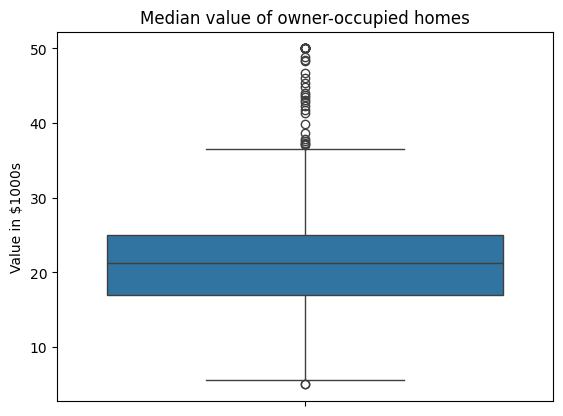

In [27]:
ax = sns.boxplot(y = 'MEDV', data = boston_df)
pyplot.title('Median value of owner-occupied homes')
pyplot.ylabel('Value in $1000s')
pyplot.show()

Provide a __bar plot__ for the Charles river variable.
- CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

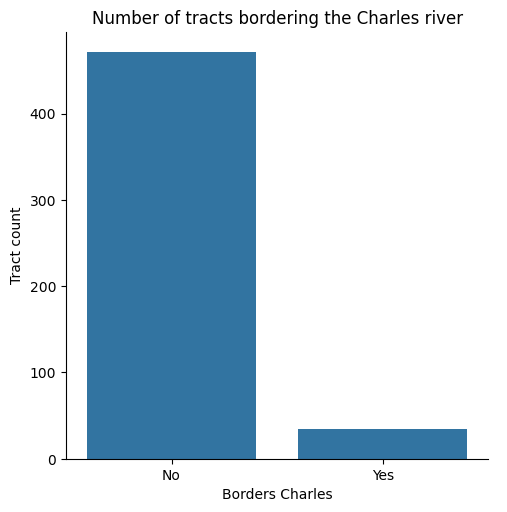

In [25]:
ax = sns.catplot(x = 'CHAS', kind = 'count', data = boston_df)
ax.set_xticklabels(['No', 'Yes'])
pyplot.title('Number of tracts bordering the Charles river')
pyplot.ylabel('Tract count')
pyplot.xlabel('Borders Charles')
pyplot.show()

Provide a __boxplot__ for the MEDV variable vs the AGE variable. Discretize the age variable into groups of <35 years, 35-70 years, and >70 years).
- MEDV - Median value of owner-occupied homes in $1000s
- AGE - proportion of owner-occupied units built prior to 1940

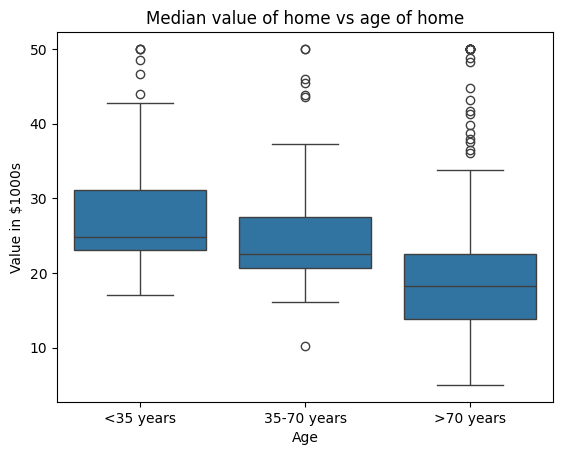

In [37]:
boston_df.loc[(boston_df['AGE'] < 35), 'age_group'] = '<35 years'
boston_df.loc[(boston_df['AGE'] >= 35) & (boston_df['AGE'] <= 70), 'age_group'] = '35-70 years'
boston_df.loc[(boston_df['AGE'] > 70), 'age_group'] = '>70 years'

ax = sns.boxplot(x = age_group, y = 'MEDV', data = boston_df, order = ['<35 years', '35-70 years', '>70 years'])
pyplot.title('Median value of home vs age of home')
pyplot.xlabel('Age')
pyplot.ylabel('Value in $1000s')
pyplot.show()

Provide a __scatter plot__ to show the relationship between nitric oxide concentrations and the proportion of non-retail business acres per town. What can be said about the relationship?
- NOX - nitric oxide concentration (pp 10 mill)
- INDUS - proportion of non-retail business acres per town

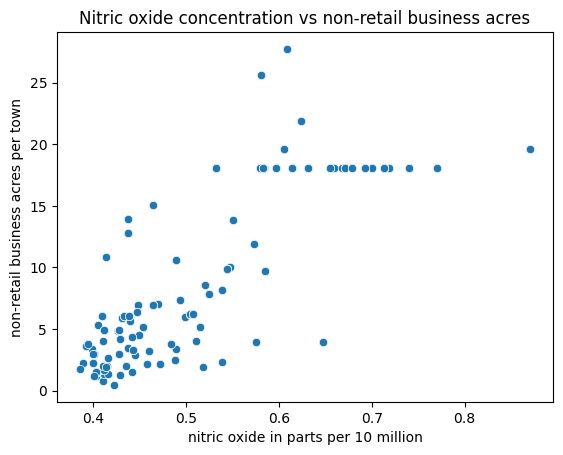

Based on the above scatterplot, we can observe that there tends to be a higher proportion of non-retail business acres at higher nitric oxide 
concentrations.


In [47]:
ax = sns.scatterplot(x = 'NOX', y = 'INDUS', data = boston_df)
pyplot.title('Nitric oxide concentration vs non-retail business acres')
pyplot.xlabel('nitric oxide in parts per 10 million')
pyplot.ylabel('non-retail business acres per town')
pyplot.show()

print('Based on the above scatterplot, we can observe that there tends to be a higher proportion of non-retail business acres at higher nitric oxide \nconcentrations.')

Create a __histogram__ for the pupil to teacher ratio variable.
- PTRATIO - pupil-teacher ratio by town

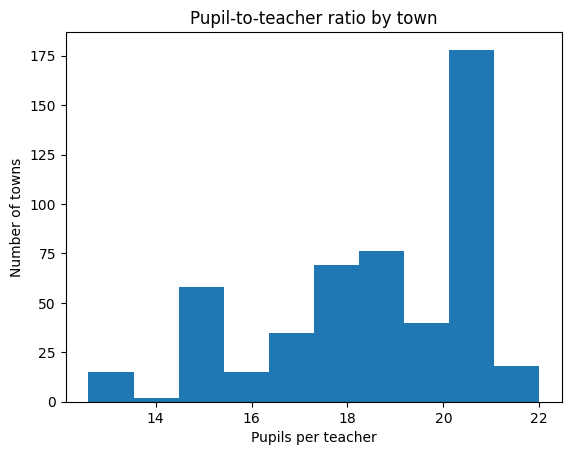

In [51]:
pyplot.hist(x = 'PTRATIO', data = boston_df)
pyplot.title('Pupil-to-teacher ratio by town')
pyplot.xlabel('Pupils per teacher')
pyplot.ylabel('Number of towns')
pyplot.show()

# Task: Use the appropriate tests to answer the questions provided.
For each of the following questions, be sure to:
1. State your hypothesis.
2. Use α = 0.05.
3. Perform the test Statistics.
4. State the conclustion from the test.

Is there a significant difference in median value of houses bounded by the Charles river vs those that are not? (T-test for independent samples)

State the hypothesis:
-   $H\_0: µ\_1 = µ\_2$, *or* There is no difference in median house value for houses bounded by the Charles vs those that are not.
-   $H\_1: µ\_1 ≠ µ\_2$, *or* There is a significant difference in median house value for houses bounded by the Charles vs those that are not.

In [53]:
scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 1]['MEDV'],
                      boston_df[boston_df['CHAS'] == 0]['MEDV'],
                      equal_var = True)

TtestResult(statistic=3.996437466090509, pvalue=7.390623170519905e-05, df=504.0)

__Conclusion:__ As the p-value is less than the alpha value of 0.05, we reject the null hypothesis. There is enough evidence that there is a significant difference in the median house value of houses that do and do not bound the Charles river.

Is there a difference in median value of houses for each proportion of owner occupied units built prior to 1940? (ANOVA)

State the hypothesis:
-   $H\_0: µ\_1 = µ\_2 = µ\_3$, *or* The three age groups have equal median house values.
-   $H\_1:$ At least one of the medians differ.

In [56]:
under_thirtyfive = boston_df[boston_df['age_group'] == '<35 years']['MEDV']
thirtyfive_seventy = boston_df[boston_df['age_group'] == '35-70 years']['MEDV']
over_seventy = boston_df[boston_df['age_group'] == '>70 years']['MEDV']

f_statistic, p_value = scipy.stats.f_oneway(under_thirtyfive, thirtyfive_seventy, over_seventy)
print('F_Statistic: {0}, P-Value: {1}'.format(f_statistic, p_value))

F_Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15


__Conclusion:__ As the p-value is less than the alpha value of 0.05, we reject the null hypothesis.There is significant evidence that age impacts median home value in this dataset.

Can we conclude that there is no relationship between nitric oxide concentrations and proportion of non-retail business acres per town? (Person Correlation)

State the hypothesis:
-   $H\_0:$ There is no relationship between nitric oxide concentration and proportion of non-retail business acres per town.
-   $H\_1:$ There is a significant relationship.

In [57]:
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

PearsonRResult(statistic=0.7636514469209192, pvalue=7.913361061210442e-98)

__Conclusion:__ As the p-value is less than the alpha value of 0.05, we reject the null hypothesis and conclude that there is a relationship between nitric oxide concentration and proportion of non-retail business acres per town.

What is the impact of an additional weighted distance to the five Boston emplyment centres on the median value of owner occupied homes? (Regression analysis)
- DIS - weighted distances to five Boston employment centres

State the hypothesis:
*   $H\_0: β1 = 0$ *or* Adding weighted distance to the five Boston employment centres has no impact on the median value of owner occupied homes.
*   $H\_1: β1 ≠ 0$ *or* Adding weighted distance to the five Boston employment centers has an impact on the median value of owner occupied homes.

In [58]:
X = boston_df['DIS']
y = boston_df['MEDV']
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Wed, 17 Apr 2024   Prob (F-statistic):           1.21e-08
Time:                        21:29:02   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""